In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path=r"C:\Users\omkar\OneDrive\Documents\Gen_AI\Data_files\Visadataset.csv"
visa_df=pd.read_csv(file_path)


cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [3]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [7]:
# Read the continent column
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [9]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

- There are total 25480 aplicants are there

- In that 25480 applicants 17018 applicants got the Visa

- 8462 applicants did not get the Visa

- also There are 16861 applicants are applied for Visa from Asia

- We want to know how many applicants from asia got certified

- And how many applicants from asia got denied

In [ ]:
# step-1: select the continent data
# step-2: continent data == 'Asia' it is con1
# step-3: slect the case staus data
# step-4: case status data =='Certified' is con2
# Step-5: con=con1&con2
# step-6: apply main df on con get the len

# banking finance
# excel csv data 
# citi hdfc icici 
# pandas == sql 

In [12]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con= con1 & con2
len(visa_df[con])

11012

In [16]:
# from different continents how many ppl are certified
lables=visa_df['continent'].unique()
for i in lables:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    cert_con= con1 & con2
    print(len(visa_df[con]))

11012
397
2037
2957
493
122


In [26]:
# from different continents how many ppl are certified
lables=visa_df['continent'].unique()
certi_count,deni_count=[],[]
for i in lables:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    cert_con= con1 & con2
    den_con= con1 & con3
    certi_count.append(len(visa_df[cert_con]))
    deni_count.append(len(visa_df[den_con]))
cols=sorted(visa_df['case_status'].unique())
print(cols)
pd.DataFrame(zip(certi_count,deni_count),
             columns=cols,index=lables)

['Certified', 'Denied']


,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**cross tab**

In [35]:
#pd.crosstab(<index>,<columns>)
col1=visa_df['continent']
col2=visa_df['case_status']
r1=pd.crosstab(col1,col2)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

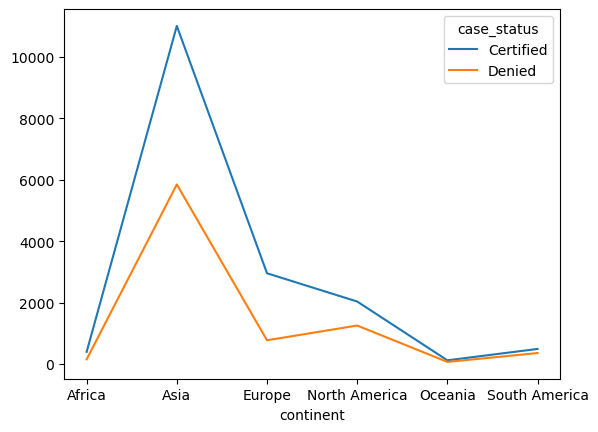

In [37]:
r1.plot()

<Axes: xlabel='continent'>

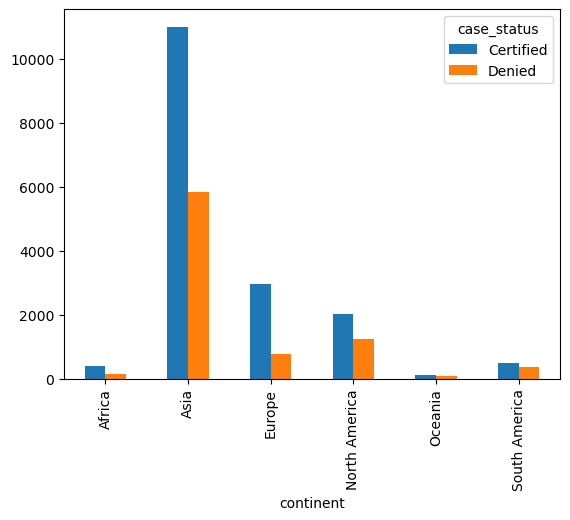

In [39]:
r1.plot(kind='bar')

**case status-continent-education_of_employee**

In [ ]:
# from asia there 16k applicants applied for visa
#      in that 11k+ ppl got certified
#           in that 11k ppl different education appliants are availabe

# we want those information

In [48]:
#pd.crosstab(<index>,<columns>)
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col2,col3]
r2=pd.crosstab(col1,cols)
r2

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<Axes: xlabel='continent'>

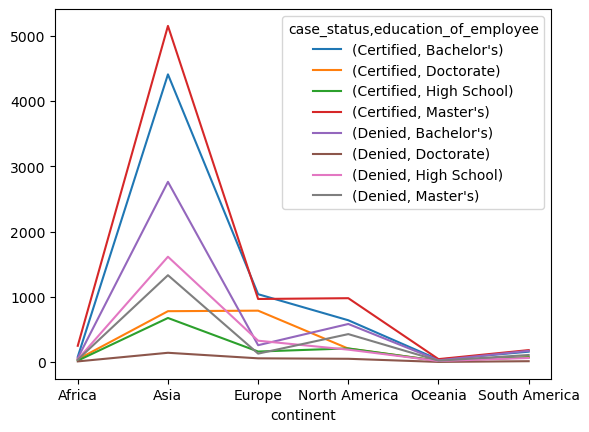

In [50]:
r2.plot()

**group by**

In [53]:
visa_df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [ ]:
visa_df['prevailing_wage']
# wages are numerical values
# 25480 applicants are available
# different applicants having the different wages

In [57]:
list(visa_df.groupby('education_of_employee'))

[("Bachelor's",
           case_id      continent education_of_employee has_job_experience  \
  2         EZYV03           Asia            Bachelor's                  N   
  3         EZYV04           Asia            Bachelor's                  N   
  6         EZYV07           Asia            Bachelor's                  N   
  7         EZYV08  North America            Bachelor's                  Y   
  8         EZYV09           Asia            Bachelor's                  N   
  ...          ...            ...                   ...                ...   
  25466  EZYV25467         Europe            Bachelor's                  Y   
  25468  EZYV25469           Asia            Bachelor's                  N   
  25473  EZYV25474           Asia            Bachelor's                  Y   
  25475  EZYV25476           Asia            Bachelor's                  Y   
  25479  EZYV25480           Asia            Bachelor's                  Y   
  
        requires_job_training  no_of_employee

In [59]:
visa_df.groupby('education_of_employee').count()

,case_id,continent,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
education_of_employee,,,,,,,,,,,
Bachelor's,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234
Doctorate,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
High School,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420
Master's,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634


In [61]:
visa_df.groupby('education_of_employee').size()

education_of_employee
Bachelor's     10234
Doctorate       2192
High School     3420
Master's        9634
dtype: int64

In [69]:
# based on group by select an another column
visa_df.groupby('education_of_employee')['prevailing_wage']

In [71]:
visa_df['prevailing_wage'].mean()
# mean wage of all 24580 obseravtion
#  Bachels,Doctors,Hs,master


74455.81459209183

In [79]:
visa_df[visa_df['education_of_employee']=="Bachelor's"]['prevailing_wage'].mean()

73405.44373547

In [81]:
visa_df.groupby('education_of_employee')['prevailing_wage'].mean()

education_of_employee
Bachelor's     73405.443735
Doctorate      64561.076657
High School    71582.147756
Master's       78843.057843
Name: prevailing_wage, dtype: float64

In [85]:
con=visa_df['case_status']=='Certified'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa             397
Asia             11012
Europe            2957
North America     2037
Oceania            122
South America      493
dtype: int64

In [87]:
con=visa_df['case_status']=='Denied'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa            154
Asia             5849
Europe            775
North America    1255
Oceania            70
South America     359
dtype: int64

In [91]:
con=visa_df['case_status']=='Certified'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa             397
Asia             11012
Europe            2957
North America     2037
Oceania            122
South America      493
dtype: int64

In [93]:
# i want to know min wage of the Asia ppl
visa_df['prevailing_wage'].min()  # 25480
con=visa_df['continent']=='Asia'
new_df=visa_df[con]
new_df['prevailing_wage'].min()

3.3188

In [95]:
visa_df.groupby('continent')['prevailing_wage'].min()

continent
Africa           32.9286
Asia              3.3188
Europe            9.1753
North America     2.1367
Oceania          24.4888
South America     3.0031
Name: prevailing_wage, dtype: float64